In [6]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates

import seaborn as sns
sns.set(rc={'figure.figsize':(28, 5)}, font_scale=2)
sns.set_style(style='whitegrid')

import math

import sys
sys.path.append('../')
import utils

In [7]:
start_date='2022-01-3 9:00'

In [11]:
def updated_density_df(df, density_df, start_date):
    # Convert the unix_time column of density_df to time to be consistent with all figures 
    unix_start_time = df.loc[0, 'unix_time']
    unix_end_time = df.loc[df.index[-1], 'unix_time']
    time_start = 0.0
    time_end = df.loc[df.index[-1], 'time']

    time_units_per_unix_time_unit = (time_end - time_start) / (unix_end_time - unix_start_time)

    # Remove rows from density_df that are before the unix_start time
    density_df = density_df[density_df['unix_time'] >= unix_start_time]

    # Add the time column to density_df
    density_df['time'] = np.nan
    for idx, row in density_df.iterrows():
        delta = row['unix_time'] - unix_start_time
        time = delta * time_units_per_unix_time_unit
        density_df.loc[idx, 'time'] = time

    # Compute the frequency in seconds
    frequency = round((3*24*3600) / len(density_df.index),5)

    density_df['timestamp'] = pd.date_range(start=start_date, periods=len(density_df.index), freq=str(frequency)+'S')

    return density_df

In [12]:
myFmt = mdates.DateFormatter('%b-%d %H:%M')


# Fixed Bandwidth

In [13]:
df = pd.read_pickle('example/part2/df.pickle')
df['timestamp'] = pd.date_range(start=start_date, periods=len(df.index), freq='8.5714min')

density_df = pd.read_pickle('example/part2/density_df.pickle')
density_df = updated_density_df(df=df, density_df=density_df, start_date=start_date)

<ipython-input-11-f78d2b3a58db>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  density_df['time'] = np.nan
/home/aristotle/Documents/superfit/env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-11-f78d2b3a58db>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

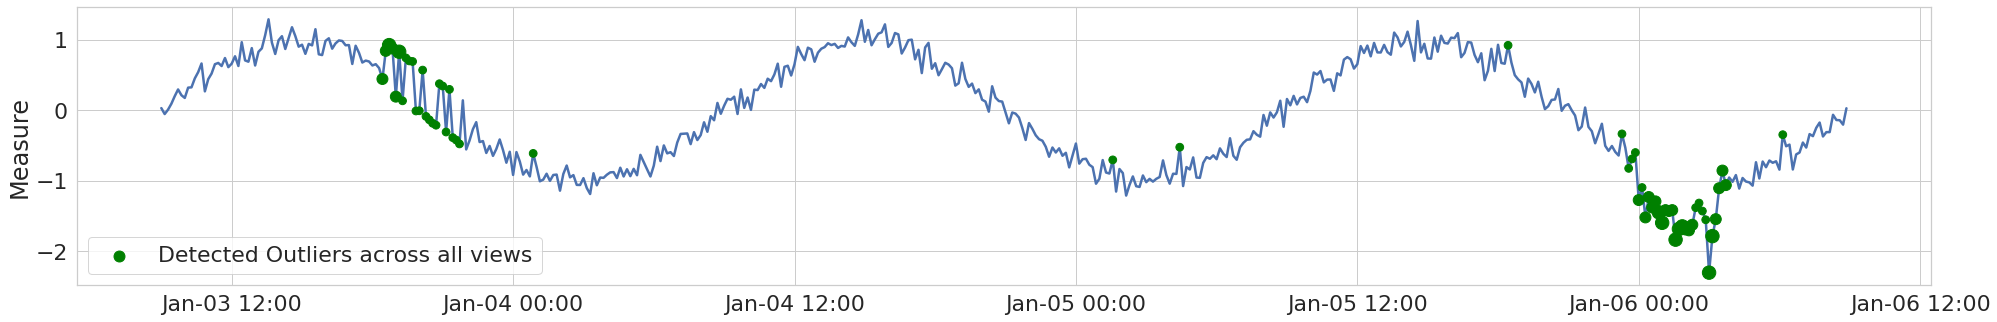

In [14]:
plt.plot(df['timestamp'], df['measure'], linewidth=2.5)
plt.scatter(df[df['raw_voting_score']>0]['timestamp'].values, df[df['raw_voting_score']>0]['measure'].values, s=60*df[df['raw_voting_score']>0]['raw_voting_score'] , c='green', zorder=10, label='Detected Outliers across all views')
plt.ylabel('Measure');plt.legend();plt.tight_layout()
plt.gca().xaxis.set_major_formatter(myFmt)
plt.savefig('figures/improving_alertable_regions/fixed_bandwidth_time_series.svg')

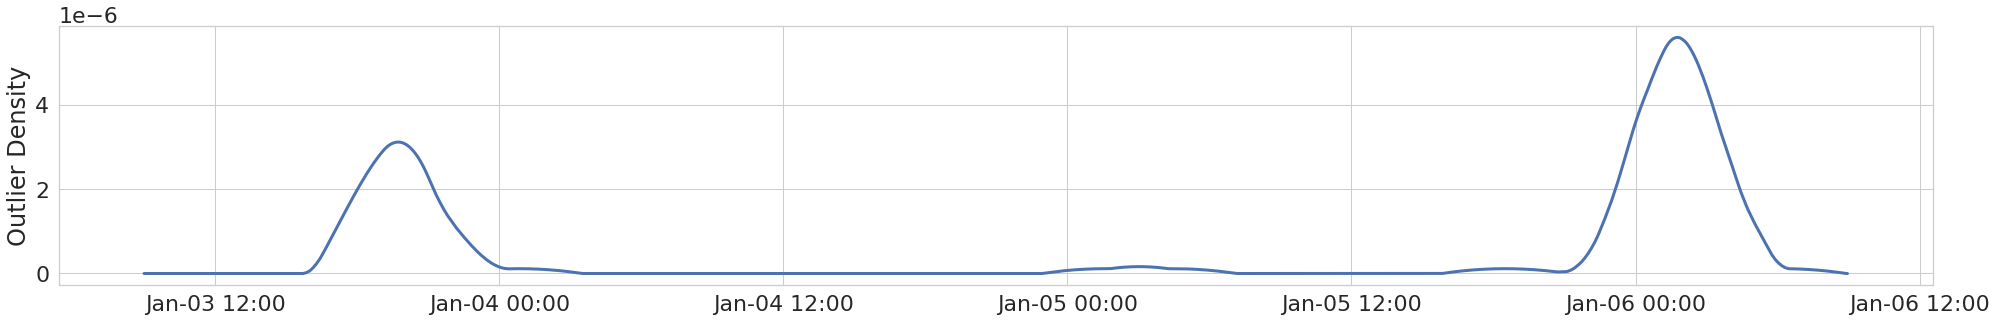

In [15]:
plt.plot(density_df['timestamp'], density_df['density'], linewidth=3)
plt.ylabel('Outlier Density');plt.tight_layout()
plt.gca().xaxis.set_major_formatter(myFmt)
plt.savefig('figures/improving_alertable_regions/fixed_bandwidth_density.svg')

# ISJ Bandwidth

In [16]:
isj_density_df = pd.read_pickle('example/part2/ISJ_bandwidth/outputs/size_504/density_df.pickle')
isj_density_df = updated_density_df(df=df, density_df=isj_density_df, start_date=start_date)

<ipython-input-11-f78d2b3a58db>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  density_df['time'] = np.nan
/home/aristotle/Documents/superfit/env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-11-f78d2b3a58db>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

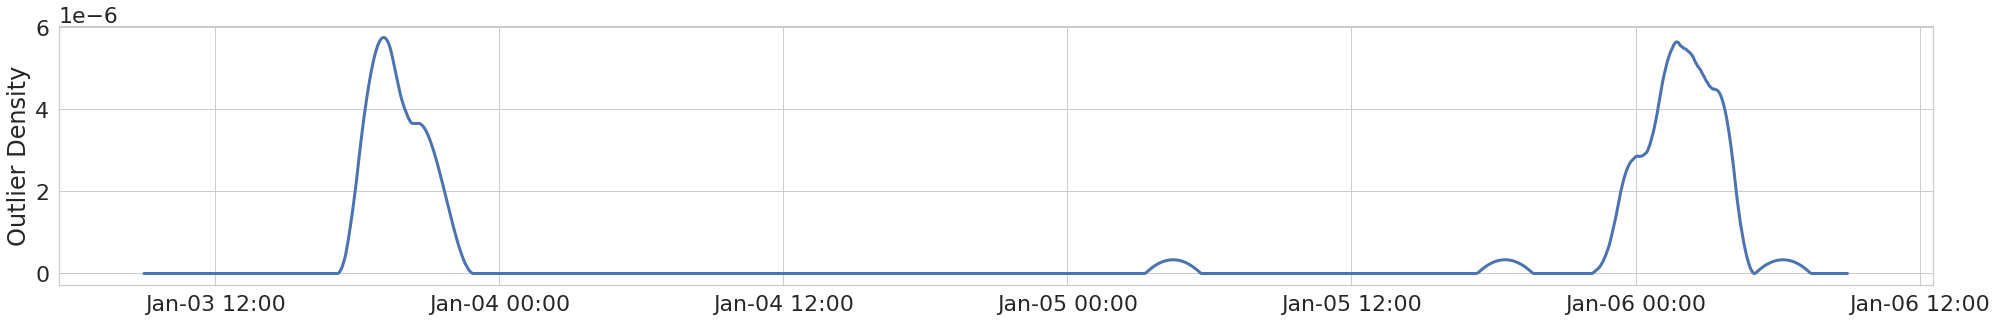

In [17]:
plt.plot(isj_density_df['timestamp'], isj_density_df['density'], linewidth=3)
plt.ylabel('Outlier Density');plt.tight_layout()
plt.gca().xaxis.set_major_formatter(myFmt)
plt.savefig('figures/improving_alertable_regions/isj_bandwidth_density.svg')

# Testing

No handles with labels found to put in legend.


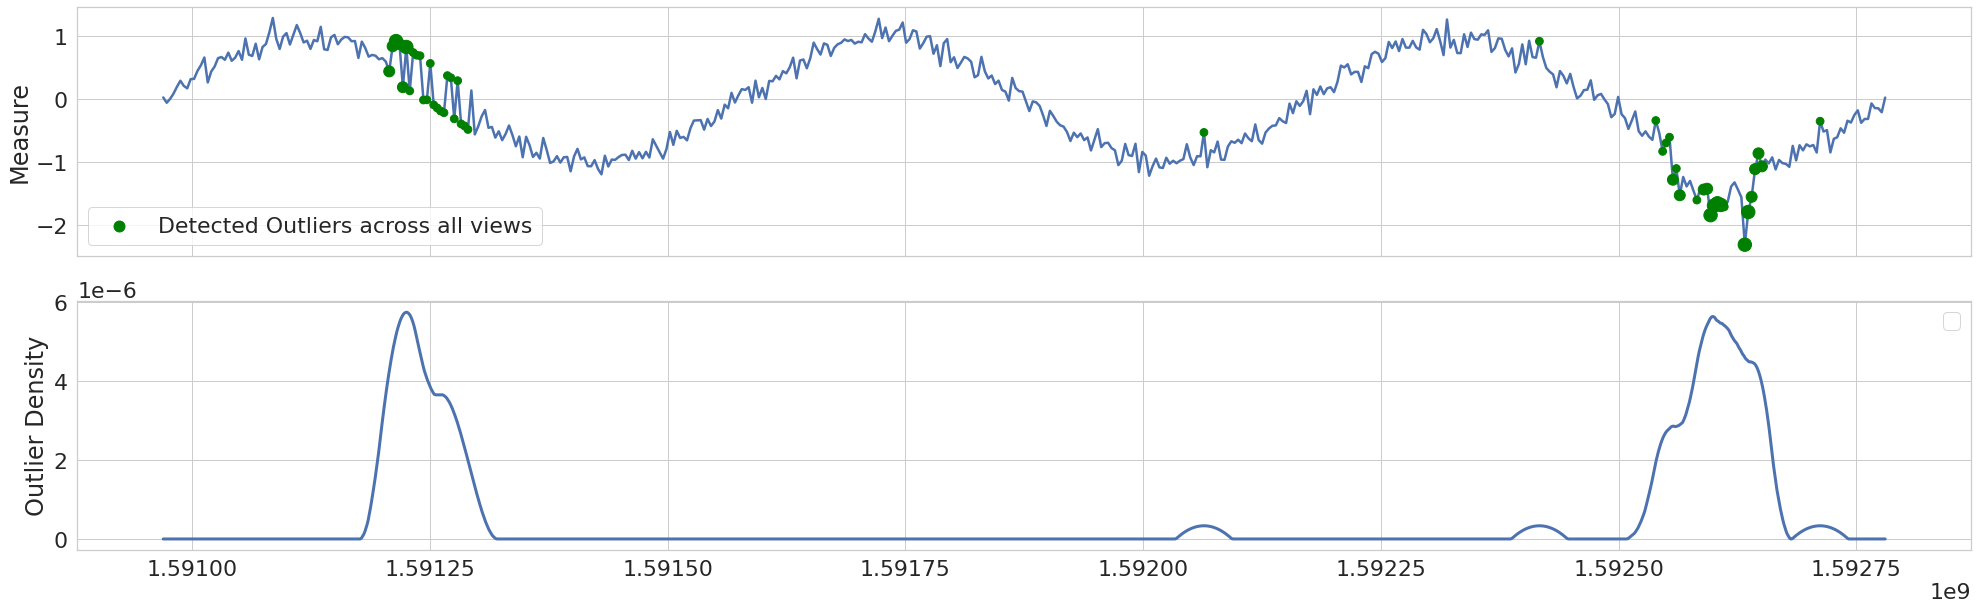

In [13]:
fig, axs = plt.subplots(2, sharex=True)
# fig.subplots_adjust(hspace=0)

# Plot the base time series with the outliers detected across all views
axs[0].plot(isj_df['unix_time'], isj_df['measure'], linewidth=2.5)
axs[0].scatter(isj_df[isj_df['raw_voting_score']>0]['unix_time'].values, isj_df[isj_df['raw_voting_score']>0]['measure'].values, s=60*isj_df[isj_df['raw_voting_score']>0]['raw_voting_score'] , c='green', zorder=10, label='Detected Outliers across all views')
axs[0].set_ylabel('Measure');axs[0].legend()

# Plot the outlier density curve
axs[1].plot(isj_density_df['unix_time'], isj_density_df['density'], linewidth=3)
axs[1].set_ylabel('Outlier Density');axs[1].legend()

plt.tight_layout()

# plt.plot(isj_density_df['unix_time'], isj_density_df['density'])